<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/BacktestingBacktrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#instala biblioteca yfinance
pip install yfinance --upgrade --no-cache-dir

In [46]:
#instala request
pip install requests_html


In [47]:
#instala biblioteca yahoo_fin
pip install yahoo_fin

In [48]:
# Instalar Backtrader
!pip install backtrader

In [64]:
# Obtenha os pacotes necessários

from datetime import datetime
import backtrader as bt
from IPython.display import display, Image
import yfinance as yf

In [65]:
#Definição de classe de estratégia cruzada de média móvel simples (SMA)

class SmaCross(bt.Strategy):
    # lista de parâmetros configuráveis para a estratégia
    params = dict(
        pfast=10,  # período para a média móvel rápida
        pslow=30   # período para a média móvel lenta
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # média móvel rápida
        sma2 = bt.ind.SMA(period=self.p.pslow)  # média móvel lenta
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal(sinal de cruzamento)

    def next(self):
        if not self.position:  # not in the market(não no mercado)
            if self.crossover > 0:  # if fast crosses slow to the upside(se o cruzamento rápido for lento para cima)
                self.buy()  # enter long(entrar por muito tempo)

        elif self.crossover < 0:  # in the market & cross to the downside(no mercado e cruze para o lado negativo)
            self.close()  # close long position(fechar posição longa)

In [66]:
# Definição de classe de estratégia de índice de força relativa (RSI)

class RSI(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data.close)

    def next(self):
        if not self.position: #Se você ainda não comprou o estoque
            if self.rsi < 30:
                self.order = self.buy()

        elif self.rsi > 70:
            self.order = self.sell()

In [67]:
from yahoo_fin.stock_info import get_data
tesla_weekly= get_data("TSLA", start_date="12/04/2019", end_date="12/04/2021", index_as_date = True, interval="1wk")
tesla_weekly

,open,high,low,close,adjclose,volume,ticker
2019-12-02,66.524002,67.772003,65.449997,67.178001,67.178001,117218500,TSLA
2019-12-09,67.318001,73.042000,67.015999,71.678001,71.678001,195420000,TSLA
2019-12-16,72.510002,82.599998,72.500000,81.117996,81.117996,368259000,TSLA
2019-12-23,82.356003,87.061996,82.000000,86.075996,86.075996,209769500,TSLA
2019-12-30,85.758003,90.800003,80.416000,88.601997,88.601997,250913500,TSLA
...,...,...,...,...,...,...,...
2021-10-11,787.650024,843.210022,785.500000,843.030029,843.030029,81405600,TSLA
2021-10-18,851.789978,910.000000,851.469971,909.679993,909.679993,109982700,TSLA
2021-10-25,950.530029,1115.209961,944.200012,1114.000000,1114.000000,220925200,TSLA
2021-11-01,1145.000000,1215.390015,1118.660034,1213.859985,1213.859985,133213200,TSLA


In [68]:
tesla_weekly.to_csv('/content/tesla.csv')

In [69]:
# Configurações do Cerebro (Mecanismo do Backtrader)

# importar para o cerebro
cerebro = bt.Cerebro()

# Importar dados financeiros do Yahoo


data = bt.feeds.YahooFinanceData(dataname= 'tesla.csv') # data final

# Adicionar dados
cerebro.adddata(data)

# Adicionar estratégia

#cerebro.addstrategy(SmaCross) 
cerebro.addstrategy(RSI) 

# Configurações do corretor
cerebro.broker.setcash(10000000)

# Configurando unidades comerciais
cerebro.addsizer(bt.sizers.SizerFix, stake=30) #30 semanas de cada vez

quantidade final :  10000000.0 1
produção :  0.0 %


<IPython.core.display.Javascript object>

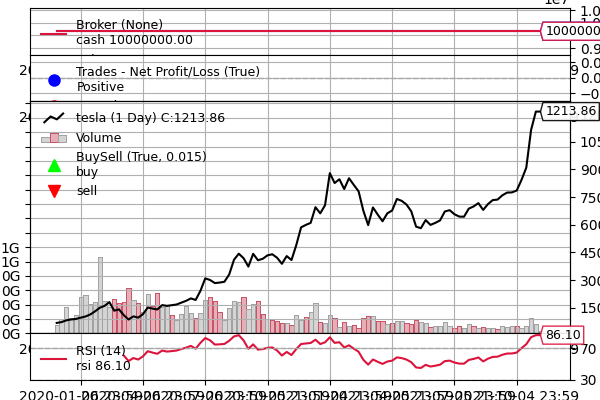

In [70]:
#  Correndo com Cerebro

# Obtenha seu investimento inicial
init_cash = cerebro.broker.getvalue()

# Correndo com Cerebro
cerebro.run()

# Obtenha o valor final
final_cash = cerebro.broker.getvalue()

print("quantidade final : ", final_cash, "1")
print("produção : ", float(final_cash - init_cash)/float(init_cash) * 100., "%")

# imprima o gráfico
cerebro.plot()[0][0].savefig('plot.png', dpi=100)
display(Image(filename='plot.png'))